In [1]:
import pandas as pd
import os

In [2]:
classified_videos_path = 'data/climate_videos_classified.jsonl'
climate_videos_classified_df = pd.read_json(classified_videos_path, lines=True)

refined_filtered_videos_path = 'data/refine_filtered_videos.jsonl'
climate_videos_refined_filtered_df = pd.read_json(refined_filtered_videos_path, lines=True)

In [3]:
climate_videos_classified_df['classification_categories_list'] = climate_videos_classified_df['classification_categories'].apply(lambda x: x.keys())

In [4]:

climate_videos_refined_filtered_df = climate_videos_refined_filtered_df.merge(climate_videos_classified_df[['display_id', 'classification_categories']], on='display_id', how='left')

In [7]:
most_common_categories = climate_videos_classified_df['classification_categories'].explode()

<Axes: title={'center': 'Top 30 Categories'}, ylabel='classification_categories'>

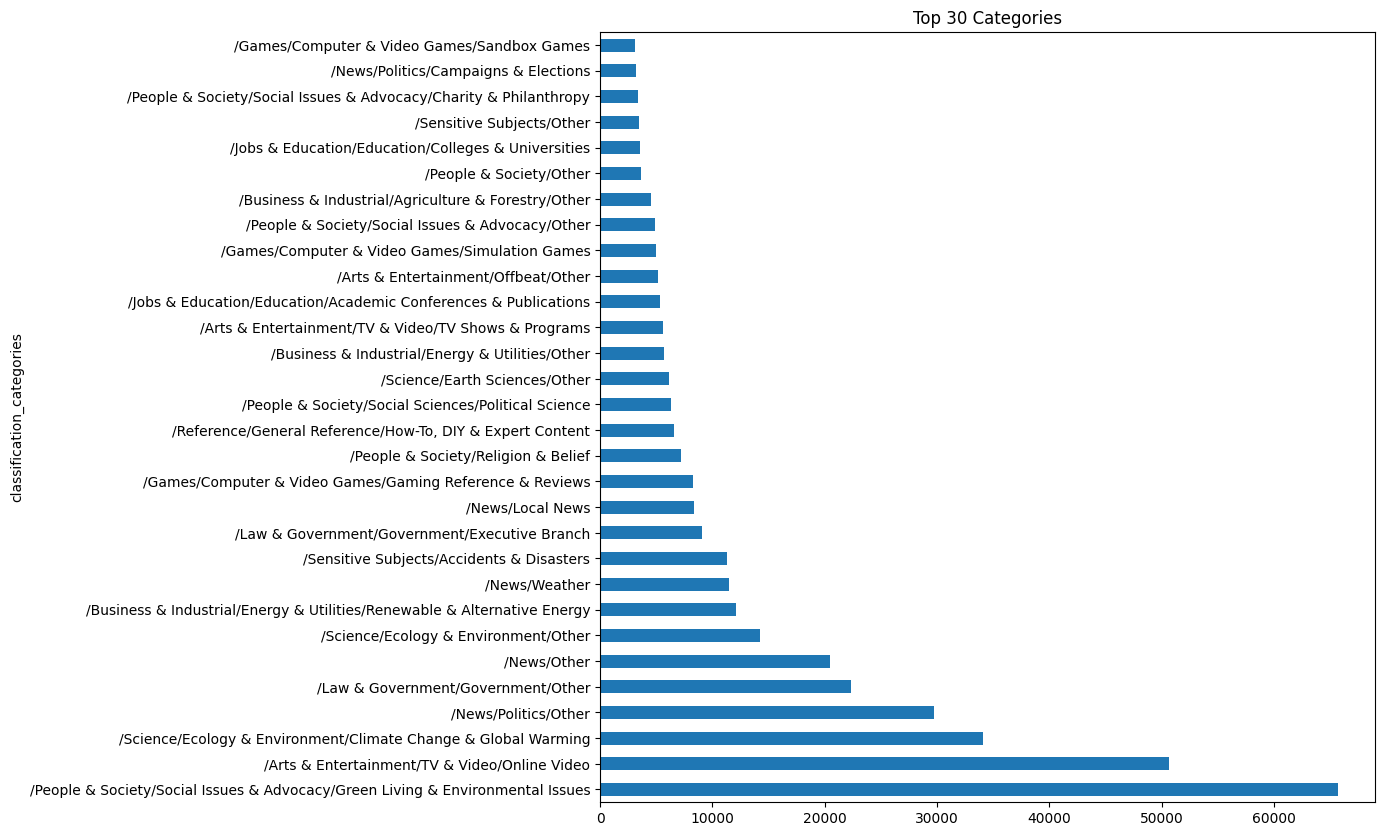

In [15]:
top_30_categories = most_common_categories.head(30)
top_30_categories.plot(kind='barh', figsize=(10, 10), title='Top 30 Categories')


In [21]:
climate_change_df = climate_videos_refined_filtered_df[climate_videos_refined_filtered_df['classification_categories'].apply(lambda x: any('Climate Change & Global Warming' in category for category in x.keys()))]


look for videos where the 'classification_categories' list contains a string containing 'Renewable & Alternative' but that is not in df

In [29]:
df = climate_videos_refined_filtered_df[
    (climate_videos_refined_filtered_df['classification_categories'].apply(lambda x: any('Green Living' in category for category in x.keys()))) |
    (climate_videos_refined_filtered_df['classification_categories'].apply(lambda x: any('Climate Change & Global Warming' in category for category in x.keys())))
]




In [35]:
renewable_alternative_videos = climate_videos_refined_filtered_df[
    (climate_videos_refined_filtered_df['classification_categories'].apply(lambda x: any('Accidents & Disasters' in category for category in x.keys()))) &
    ~(climate_videos_refined_filtered_df['display_id'].isin(df['display_id']))
]

In [36]:
len(renewable_alternative_videos)

3620

In [49]:
renewable_alternative_videos.loc[45179, 'description']


"http://www.Suspicious0bservers.org\xa0\nhttp://www.SpaceWeatherNews.com\nhttp://www.MagneticReversal.org\nhttp://www.ObservatoryProject.com\nhttp://www.EarthChanges.org\n\nSolar Alerts on Twitter: https://twitter.com/TheRealS0s\nTHE DISASTER PREDICTION APP: http://kck.st/1RO4K82\n\nGood Videos/Articles:\nThe Sun is Going to Sleep: http://www.youtube.com/watch?v=7whL9jvdL5s\nTop 6 Climate Change Problems: http://www.youtube.com/watch?v=4Ew05sRDAcU\nPause on Pausing the Pause: http://www.youtube.com/watch?v=CZH46p7MUlw\nSun Series: http://www.youtube.com/playlist?list=PLHSoxioQtwZcJj_9clLz7Bggso7qg2PDj\nIPCC History: http://www.suspicious0bservers.org/selections-from-the-1st-ipcc-full-report-wg1/\n\nToday's Featured Links:\nLa Nina? https://weather.com/news/climate/news/la-nina-noaa-update-september\n\nOriginal music by NEMES1S\n\nWORLD WEATHER:\nTY WindMap: https://www.windyty.com\nEarth WindMap: http://earth.nullschool.net/#current/wind/isobaric/850hPa/orthographic=-345.32,51.43,481\n

In [44]:
renewable_alternative_videos.sample(10).title

73213    Drone footage shows panorama of Shenzhen lands...
35063                Sharks Discovered Living In A Volcano
82282     Snow Storm Disrupts Travel, Makes Life Difficult
94379                   The Aftermath of Natural Disasters
31478                 Flooding in Texas view from airplane
42978    Rush Limbaugh EVACUATES Florida After Calling ...
80637    Rasamayi Balakishan Vs Ponnam Prabhakar | One ...
74132    This day in history May 17th: natural disaster...
45179    Volcanos, Quakes, Typhoon MagStorm Watch | S0 ...
60614               Floods in western India kill 20 people
Name: title, dtype: object